In [33]:
import numpy as np 
from itertools import combinations
from tqdm import tqdm

# Total variation on a graph cellular sheaf

Now we'll design a toy example where the total variation is zero by construction, yielding so a problem with a closed form solution. 
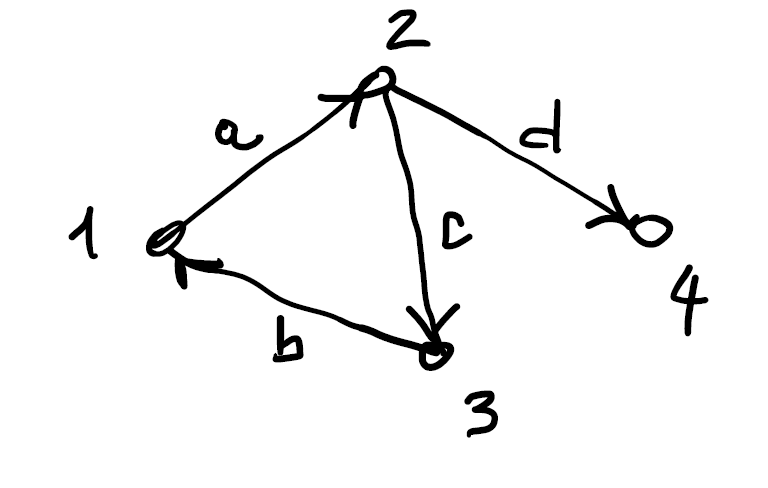

The coboundary map is the following: 
\begin{bmatrix}
    -F_{a1} & -F_{b1} & 0 & 0 \\
    F_{a2} & 0 & -F_{c2} & -F_{d2} \\
    0 & -F_{b3} & F_{c3} & 0 \\
    0 & 0 & 0 & F_{d4}
\end{bmatrix}

Now we'll sample $x_1$ at random and then define:
$$x_2 = F_{a1}^T x_1$$
$$x_3 = F_{b3}^T x_1$$
$$x_4 = F_{d2}^T F_{a1}^T x_1$$

The following choices for the linear maps should yield a total variation equal to zero: 
+ $F_{a1}$ random, $F_{a2}$ = $\mathbb{I}$;
+ $F_{b3}$ random, $F_{b1}$ = $\mathbb{I}$;
+ $F_{c2} = F_{a1}^{-1}F_{b3}^{-1}$, $F_{c3}$ = $\mathbb{I}$;
+ $F_{d2}$ random, $F_{d4}$ = $\mathbb{I}$;

In [34]:
V = 4
edges = [
    (1,2),
    (2,3),
    (2,4),
    (1,3)
]

E = len(edges)
d = 5

In [35]:
# Linear maps generation

F_a2 = np.eye(d)
F_c3 = np.eye(d)
F_d4 = np.eye(d)
F_b1 = np.eye(d)

F_b3 = np.random.randn(d,d)
F_a1 = np.random.randn(d,d)
F_c2 = np.linalg.inv(F_a1) @ np.linalg.inv(F_b3)
F_d2 = np.random.randn(d,d)

In [44]:
# Coboundary map

B1 = np.zeros((E*d, V*d))

B1[0:5, 0:5] = -F_a1
B1[0:5, 5:10] = F_b1
B1[5:10, 0:5] = F_a2
B1[5:10, 10:15] = -F_c2
B1[5:10, 15:20] = -F_d2
B1[10:15, 5:10] = -F_b3
B1[10:15, 10:15] = F_c3
B1[15:20, 15:20] = F_d4

In [45]:
# Sheaf Laplacian

L = B1 @ B1.T

In [46]:
N = 100

x_1 = np.random.randn(d,1)
x_2 = F_a1.T @ x_1
x_3 = np.linalg.inv(F_b3.T) @ x_1
x_4 = F_d2.T @ F_a1.T @ x_1

X = np.vstack([x_1, x_2, x_3, x_4])

In [52]:
np.trace(X.T @ L @ X)

7.396572996700034e-14

In [47]:
F_a2.T @ x_2 - F_a1.T @ x_1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [48]:
F_b1.T @ x_1 - F_b3.T @ x_3

array([[ 1.11022302e-16],
       [-2.22044605e-16],
       [-2.77555756e-16],
       [ 0.00000000e+00],
       [ 2.22044605e-16]])

In [49]:
F_c3.T @ x_3 - F_c2.T @ x_2

array([[ 0.00000000e+00],
       [ 4.44089210e-16],
       [ 5.13478149e-16],
       [-7.21644966e-16],
       [ 5.55111512e-16]])

In [50]:
F_d4.T @ x_4 - F_d2.T @ x_2

array([[ 8.88178420e-16],
       [ 1.77635684e-15],
       [ 4.44089210e-16],
       [ 1.77635684e-15],
       [-8.88178420e-16]])

In [51]:
B1.T @ X

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [-5.55111512e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 4.16333634e-17],
       [-4.44089210e-16],
       [ 0.00000000e+00],
       [-1.94289029e-16],
       [ 4.44089210e-16],
       [ 0.00000000e+00],
       [ 4.44089210e-16],
       [ 5.68989300e-16],
       [-6.10622664e-16],
       [ 3.33066907e-16],
       [ 8.88178420e-16],
       [ 0.00000000e+00],
       [ 8.88178420e-16],
       [ 1.77635684e-15],
       [-8.88178420e-16]])